In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("data_clean.csv" , index_col = 0 )

In [23]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [7]:
data.shape

(158, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [13]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [15]:
data['Month'] = pd.to_numeric(data['Month'],errors = 'coerce')

In [19]:
data['Temp'] = pd.to_numeric(data['Temp'],errors = 'coerce')
data['Weather'] = data['Weather'].astype('category')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   158 non-null    object  
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 11.4+ KB


In [24]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [25]:
data_cleaned = data.drop('Temp C', axis=1)

In [26]:
data_cleaned

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S
157,14.0,191.0,14.3,9.0,28,2010,75,S


{'whiskers': [<matplotlib.lines.Line2D at 0x20b40569b50>,
 'caps': [<matplotlib.lines.Line2D at 0x20b405841f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b40569880>],
 'medians': [<matplotlib.lines.Line2D at 0x20b405846d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b405849a0>],
 'means': []}

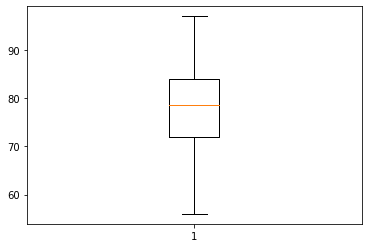

In [24]:
plt.boxplot(data.Temp)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp'>

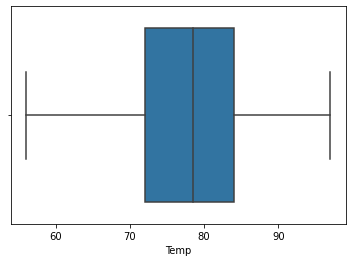

In [25]:
sns.boxplot(data.Temp)

In [27]:
data['Temp'].describe()

count    158.000000
mean      77.727848
std        9.377877
min       56.000000
25%       72.000000
50%       78.500000
75%       84.000000
max       97.000000
Name: Temp, dtype: float64

<AxesSubplot:>

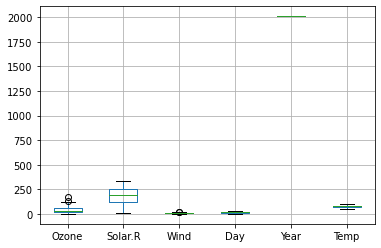

In [29]:
data.boxplot()

In [30]:
data.Weather.value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

<AxesSubplot:ylabel='Weather'>

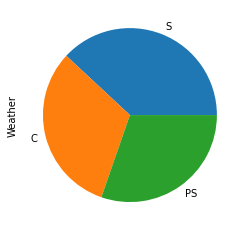

In [31]:
data.Weather.value_counts().plot(kind='pie')

<AxesSubplot:>

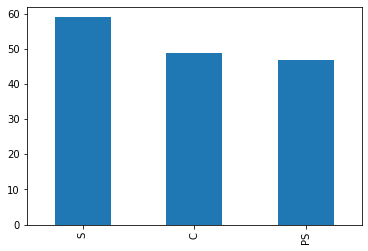

In [32]:
data.Weather.value_counts().plot(kind='bar')

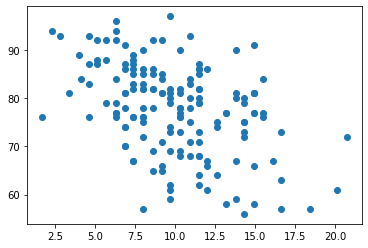

In [33]:
plt.scatter(x='Wind',y='Temp',data=data)

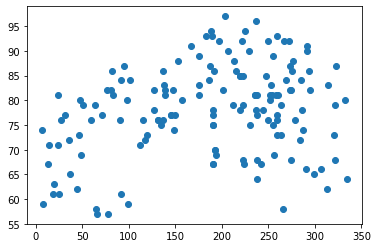

In [35]:
plt.scatter(x='Solar.R',y='Temp',data=data)

<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>

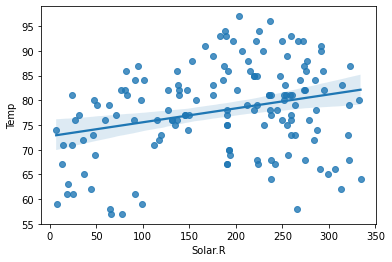

In [40]:
sns.regplot(x='Solar.R',y='Temp',data=data)

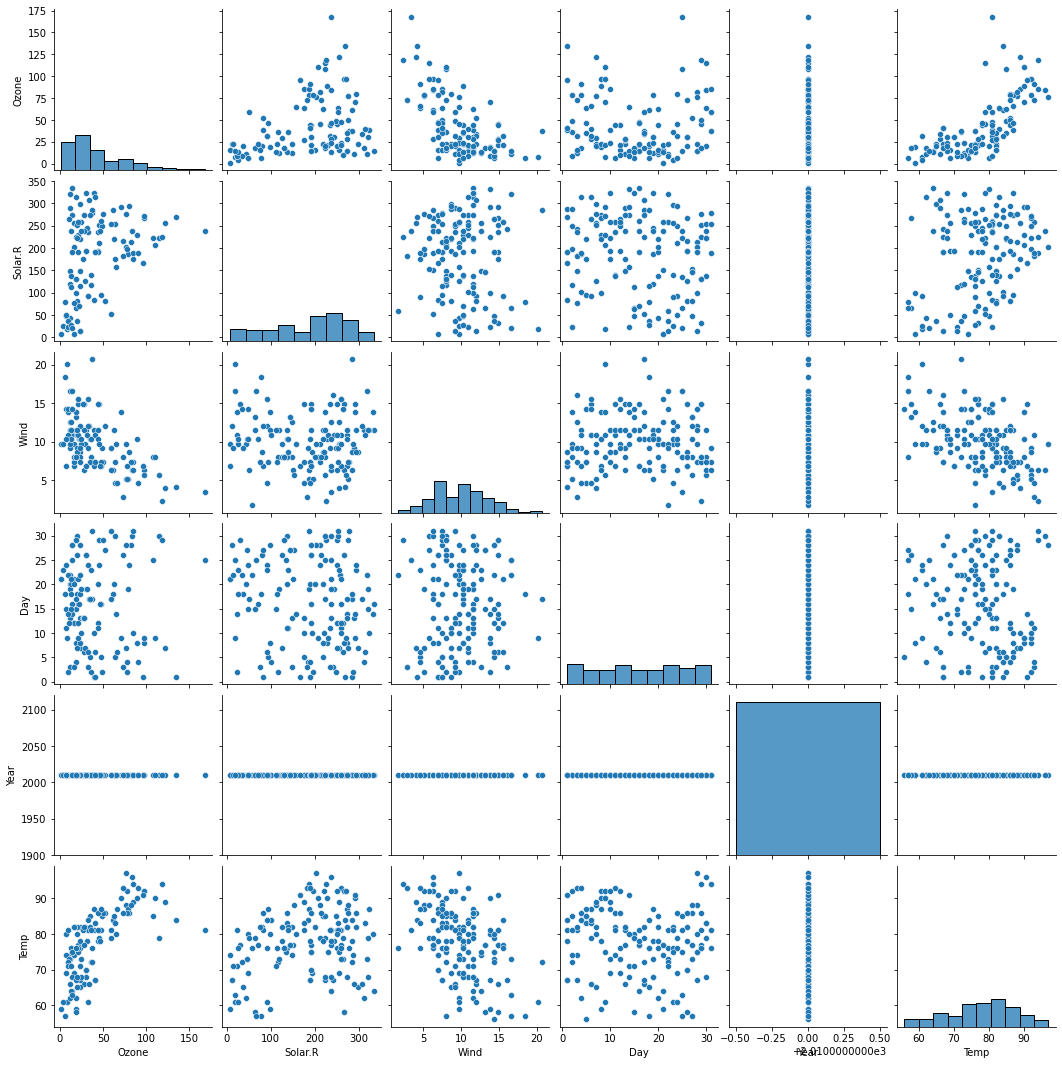

In [36]:
sns.pairplot(data)

<AxesSubplot:xlabel='Temp', ylabel='Ozone'>

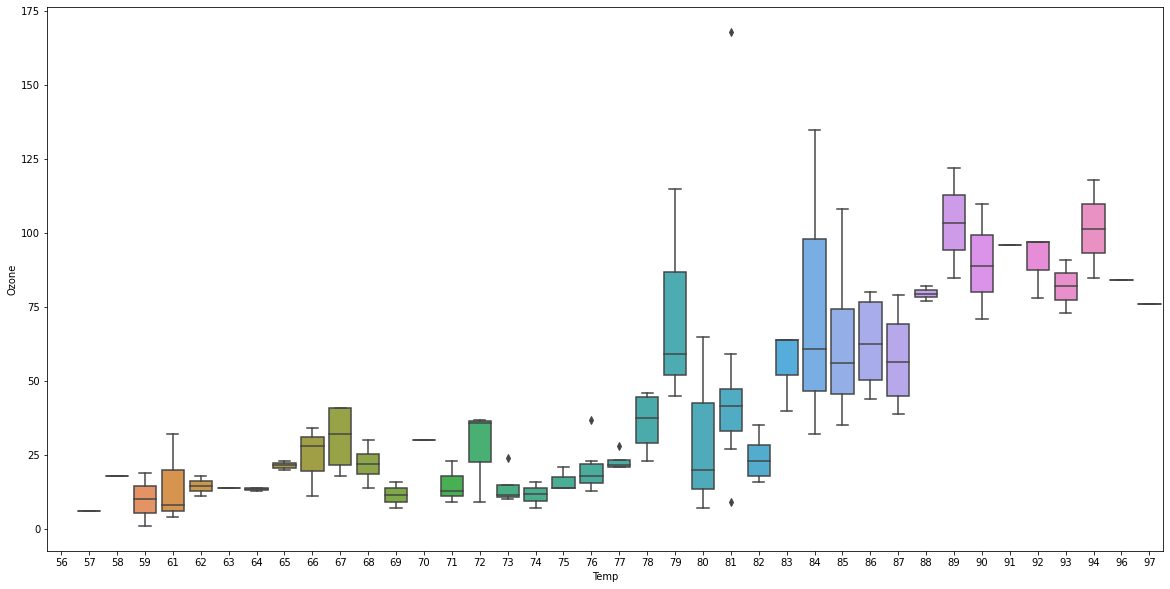

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Temp', y='Ozone', data=data)